Level 1



Task 1: Data Cleaning and Preprocessing
Description: 
Work with a raw dataset (e.g., CSV file) that contains missing values, duplicates, and inconsistent data formats.

Objectives:
Load the dataset using pandas.
Identify and handle missing values (e.g., imputation or removal).
Remove duplicate rows and standardize inconsistent data formats (e.g., date formats, categorical variables).
Tools: Python, pandas.


In [2]:
import pandas as pd
df=pd.read_csv(r'C:\Users\yashc\1) iris.csv')

In [18]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB
None
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [19]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [21]:
df['sepal_length'] = df['sepal_length'].fillna(df['sepal_length'].mean())
df['sepal_width']  = df['sepal_width'].fillna(df['sepal_width'].mean())
df['petal_length'] = df['petal_length'].fillna(df['petal_length'].mean())
df['petal_width']  = df['petal_width'].fillna(df['petal_width'].mean())
df['species']      = df['species'].fillna(df['species'].mode()[0])


In [22]:
df = df.drop_duplicates()

In [23]:
df['species'] = df['species'].str.strip().str.lower()

In [24]:
print("\nAfter cleaning:\n", df.info())
print("\nNumber of duplicates now:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB

After cleaning:
 None

Number of duplicates now: 0


In [25]:
df.to_csv("cleaned_iris.csv", index=False)

Task 2: Exploratory Data Analysis (EDA)

Description: Perform an exploratory analysis on given dataset to identify patterns, trends, and summary statistics.

Objeactive: Calculate summary statistics (mean, median,Standard Deviation,).
Visualize data distributions using histograms, boxplots and scatter plot.
Find correlations between numerical features.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv("cleaned_iris.csv")


In [30]:
print("\nSummary Statistics:\n")
(df.describe())


Summary Statistics:



,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
print("\nMedian values:\n", df.median(numeric_only=True))


Median values:
 sepal_length    5.8
sepal_width     3.0
petal_length    4.4
petal_width     1.3
dtype: float64


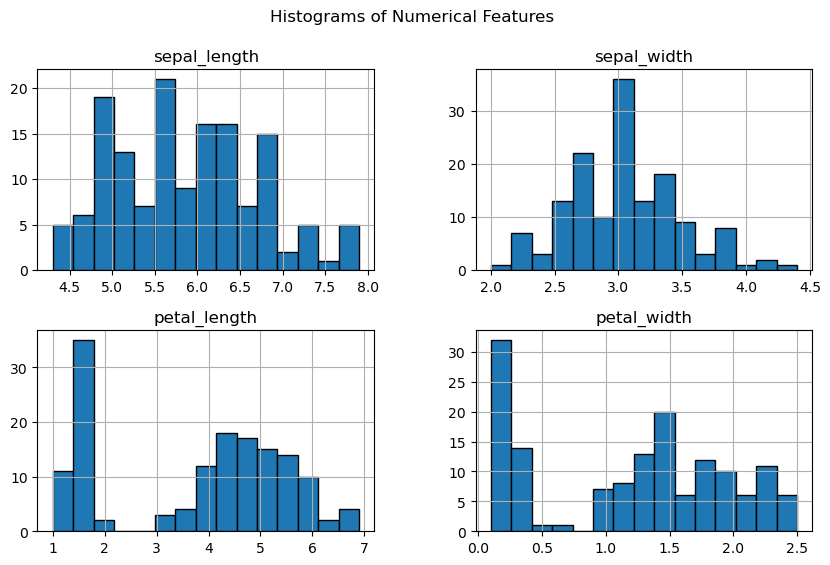

In [32]:
df.hist(figsize=(10, 6), bins=15, edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()

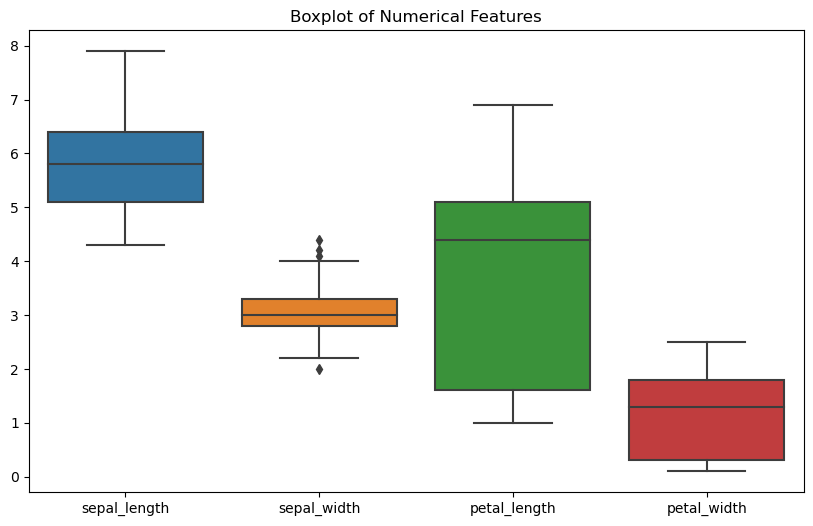

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['species']))
plt.title("Boxplot of Numerical Features")
plt.show()

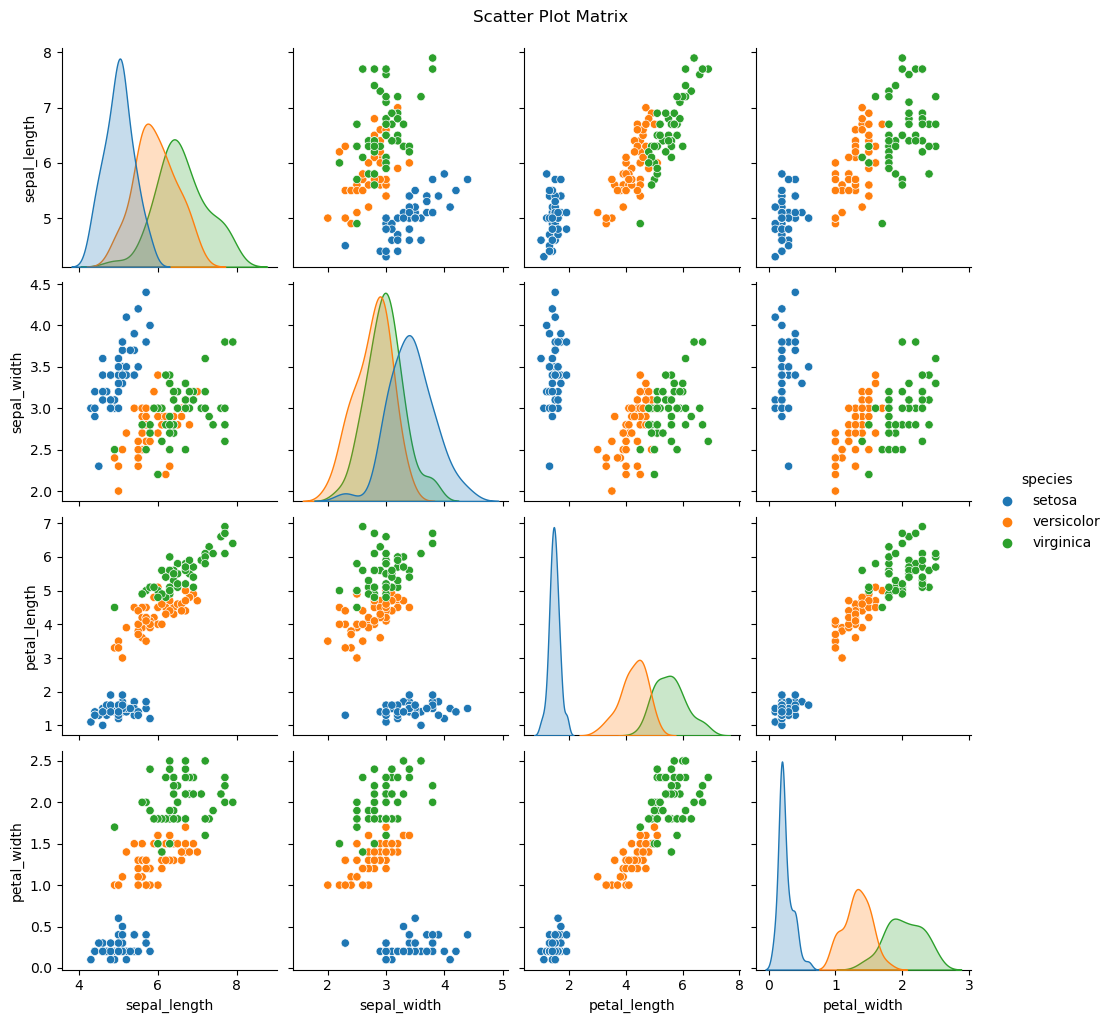

In [34]:
sns.pairplot(df, hue="species")
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()

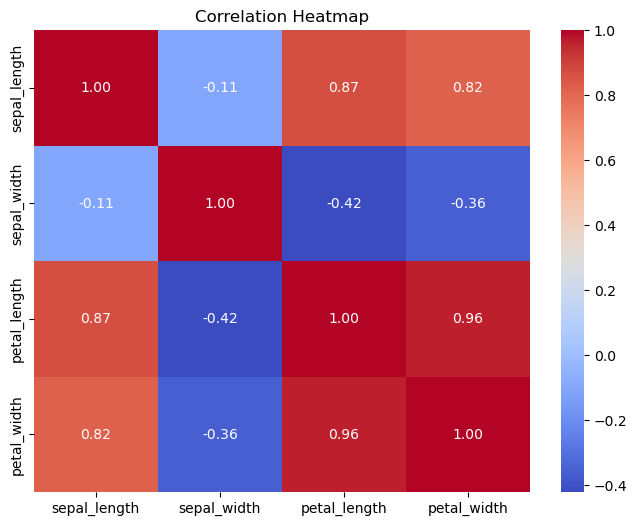

In [36]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Task 3: Basic Data Visualization

Description: Create basic plots and charts to visualize the distribution and relationships within the dataset.

Objectives:
Create bar plots, line charts, and scatter plots.
Customize plot labels, titles, and legends. Export plots as images for reports.



In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
df = pd.read_csv("cleaned_iris.csv")

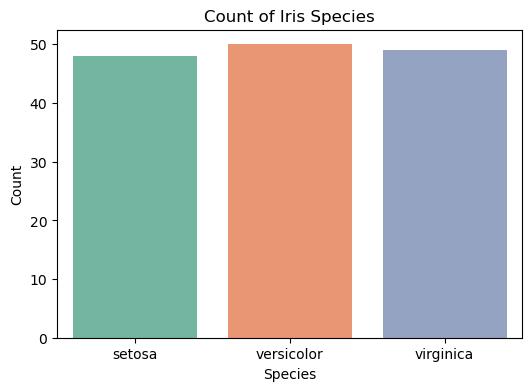

In [41]:
plt.figure(figsize=(6, 4))
sns.countplot(x="species", data=df, palette="Set2")
plt.title("Count of Iris Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.savefig("barplot_species.png")  # export plot
plt.show()

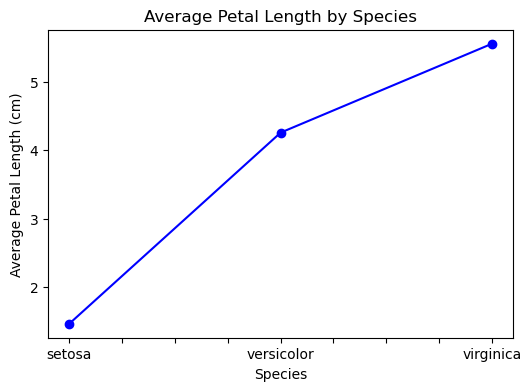

In [42]:
plt.figure(figsize=(6, 4))
avg_petal = df.groupby("species")["petal_length"].mean()
avg_petal.plot(marker="o", linestyle="-", color="blue")
plt.title("Average Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.savefig("linechart_petal.png")
plt.show()


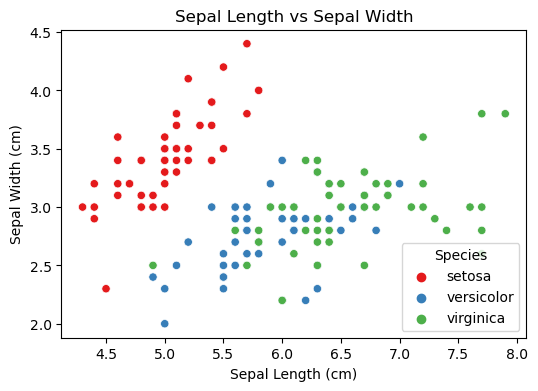

In [43]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=df, palette="Set1")
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species")
plt.savefig("scatter_sepal.png")
plt.show()